# Ejercicio Clasificacion 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_multilabel_classification

In [3]:
n_classes = 3
n_labels = 1
# length=150

In [4]:
X, Y = make_multilabel_classification(n_samples=1000, 
                                      n_features=3,
                                      n_classes=n_classes, 
                                      n_labels=1)
y = Y.sum(1)

In [5]:
X.shape

(1000, 3)

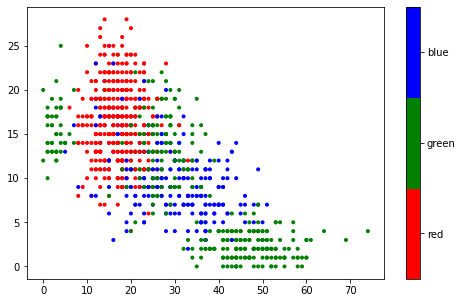

In [6]:
COLORS = ['red','green','blue']
                   
fig = plt.figure(figsize=(8,5))

plt.scatter(X[:, 0], X[:, 2], c=list(Y.sum(1)),
           cmap=matplotlib.colors.ListedColormap(COLORS),
           marker='.')

cb = plt.colorbar()
loc = np.arange(0,max(Y.sum(1)), max(Y.sum(1))/float(len(COLORS))) + 0.5
cb.set_ticks(loc)
cb.set_ticklabels(COLORS)

#### Normalizacion de datos

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
X[1]

array([-0.51737117,  0.49239793,  1.43853616])

#### Division del conjunto de entrenamiento

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5)

#### Seleccion de Algoritmo

In [9]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')

svc_model = svc_model.fit(X_train, y_train)

#### Validacion

In [10]:
from sklearn.metrics import precision_recall_fscore_support

In [11]:
y_pred = svc_model.predict(X_test)

prec, reca, f1, support = precision_recall_fscore_support(y_test, y_pred,
                                                    average='macro',
                                                    zero_division=1)
f1

0.38404813376638014

#### Hiperparametros

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','poly', 'rbf'), 'C':[1, 10]}

clf = GridSearchCV(SVC(), parameters, cv=5)

clf = clf.fit(X_train, y_train)

results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004119,0.000255,0.000928,0.000093,1,linear,"{'C': 1, 'kernel': 'linear'}",0.68,0.66,0.65,0.69,0.66,0.668,0.014697,3
1,0.006328,0.000893,0.001135,0.000254,1,poly,"{'C': 1, 'kernel': 'poly'}",0.62,0.59,0.62,0.60,0.62,0.610,0.012649,6
2,0.003762,0.000195,0.001203,0.000130,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.82,0.81,0.80,0.80,0.82,0.810,0.008944,2
3,0.006903,0.000473,0.000876,0.000094,10,linear,"{'C': 10, 'kernel': 'linear'}",0.68,0.66,0.65,0.68,0.67,0.668,0.011662,3
4,0.014577,0.008460,0.000997,0.000070,10,poly,"{'C': 10, 'kernel': 'poly'}",0.64,0.66,0.69,0.66,0.62,0.654,0.023324,5
5,0.003759,0.000313,0.000927,0.000076,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.86,0.83,0.83,0.81,0.79,0.824,0.023324,1


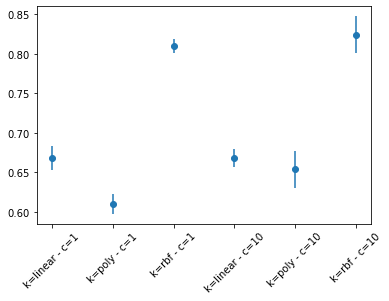

In [13]:
mean_score = results['mean_test_score']
std_score = results['std_test_score']
kernels = results['param_kernel']
param_c = results['param_C']

plt.errorbar(range(mean_score.shape[0]), mean_score, 
             yerr=std_score, marker='o', linestyle='')


labelparam = ['k={} - c={}'.format(a, b) for a, b in zip(kernels.values, param_c.values)]

plt.xticks(range(len(labelparam)), labelparam, rotation=45)

# plt.ylim(0.75, 0.85)
plt.show()

#### Metricas

In [14]:
print(clf.best_estimator_, clf.best_estimator_.kernel)

SVC(C=10) rbf


In [15]:
y_pred = clf.best_estimator_.predict(X_test)
prec, reca, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                    average='macro')
f1

0.6301505152532163

In [16]:
from utils import plot_cm # esta es la libreria que ocupamos ebn la ayudantia pasada de clasificacion

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')

Text(0.5, 15.0, 'valores predichos')

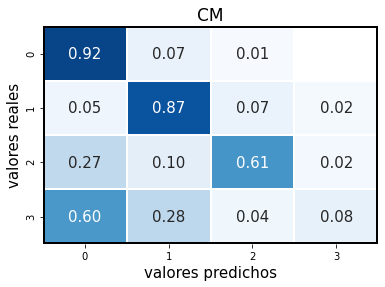

In [18]:
fig, axes = plt.subplots(1,1)
plot_cm(cm, axes)

axes.set_ylabel('valores reales', fontsize=15)
axes.set_xlabel('valores predichos', fontsize=15)

In [19]:
uniques, counts = np.unique(y, return_counts=True)

In [20]:
for a, b in zip(uniques, counts):
    
    print(a, b)
    

0 392
1 372
2 184
3 52
